In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from IPython.display import display

In [3]:
banking_data = pd.read_excel('./data/Churn-Modelling.xlsx')
banking_data.drop('RowNumber', axis=1, inplace=True)
banking_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
def chi_square(df, feature, target):
    
    table = pd.crosstab(df[feature], df[target])
    _, p, *_ = stats.chi2_contingency(table.values)
    
    return p

def chi2_significance_test(df, feature, target, confidence_level = .05):
    p = chi_square(df, feature, target)
    
    return p < confidence_level
        
    
proportion_leaving = banking_data['Exited'].mean()

print(f"The proportion of customers leaving: {proportion_leaving*100:.0f}%")

The proportion of customers leaving: 20%


Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


p = 0.0000


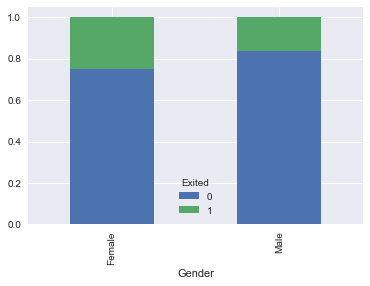

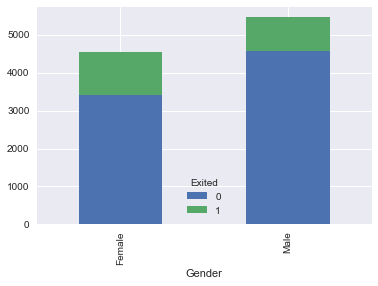

In [69]:
banking_data_gender = banking_data.groupby('Gender')
gender_proportion = banking_data_gender['Exited'].mean()

table = pd.crosstab(banking_data['Gender'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)

table.apply(lambda x: x/table.sum(axis=1)).plot.bar(stacked=True)

table.plot.bar(stacked=True)

print(f'p = {p:.4f}')

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


p = 0.4924


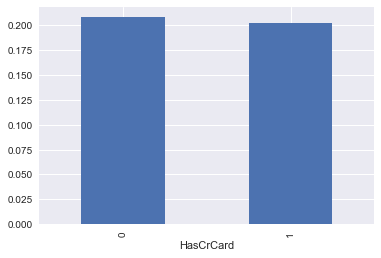

In [7]:
banking_data_card = banking_data.groupby('HasCrCard')
card_proportion = banking_data_card['Exited'].mean()

table = pd.crosstab(banking_data['HasCrCard'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)

card_proportion.plot.bar()
print(f'p = {p:.4f}')

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


p = 0.0000


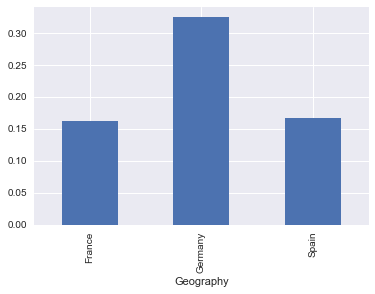

In [8]:
table = pd.crosstab(banking_data['Geography'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'p = {p:.4f}')
banking_data.groupby('Geography')['Exited'].mean().plot.bar()

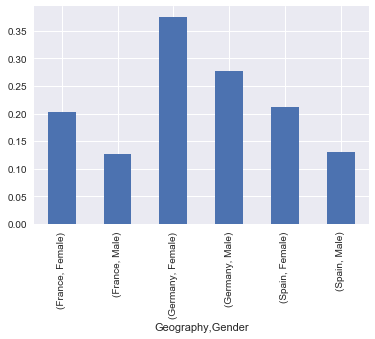

In [71]:
banking_data.groupby(['Geography', 'Gender'])['Exited'].mean().plot.bar()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: Exited, dtype: int64


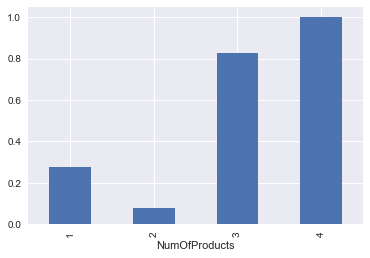

In [73]:
banking_data.groupby('NumOfProducts')['Exited'].mean().plot.bar()
print(banking_data.groupby('NumOfProducts')['Exited'].count())

In [11]:
banking_data['Validation'] = banking_data['CustomerId'] % 10
banking_data.drop('CustomerId', axis=1, inplace=True)
banking_data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Validation
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,4
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,8


Exited,0,1
Validation,,
0,796,213
1,803,214
2,781,189
3,750,213
4,847,203
5,785,176
6,811,224
7,787,201
8,778,218


p = 0.2771


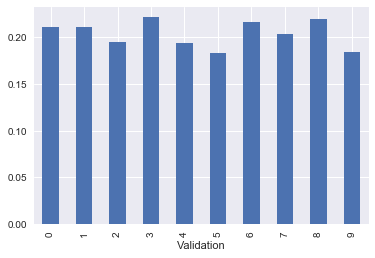

In [15]:
banking_data_validation = banking_data.groupby('Validation')
table = pd.crosstab(banking_data['Validation'], banking_data['Exited'])

display(table)

chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'p = {p:.4f}')
banking_data_validation['Exited'].mean().plot.bar()

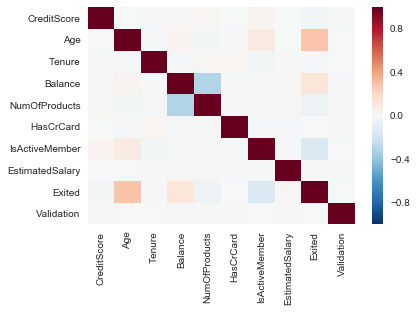

In [16]:
corr = banking_data.corr()

sns.heatmap(corr)

In [17]:
f = lambda col: chi2_significance_test(banking_data, col, 'Exited')
for col in banking_data.columns[:-2]:
    print(f"{col} significant {f(col)}")

Surname significant False
CreditScore significant True
Geography significant True
Gender significant True
Age significant True
Tenure significant False
Balance significant True
NumOfProducts significant True
HasCrCard significant False
IsActiveMember significant True
EstimatedSalary significant False


In [18]:
cols = ['Surname', 'Tenure', 'HasCrCard', 'EstimatedSalary', 'Validation', 'Exited']
target = banking_data['Exited']
data = banking_data.drop(cols, axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [19]:
data=pd.get_dummies(data)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3)

cls = LogisticRegression()

cls.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
accuracy_score(y_test, cls.predict(X_test))

0.78866666666666663

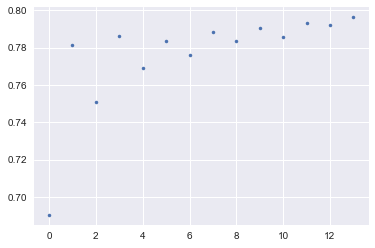

In [27]:
acc = []
for k in range(1, 15):
    cls = KNeighborsClassifier(k)
    cls.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, cls.predict(X_test)))
    
plt.plot(acc, '.')

In [18]:
cls = SVC()
cls.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
accuracy_score(y_test, cls.predict(X_test))

0.79533333333333334

In [20]:
cls = DecisionTreeClassifier(max_depth=5)
cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.85899999999999999

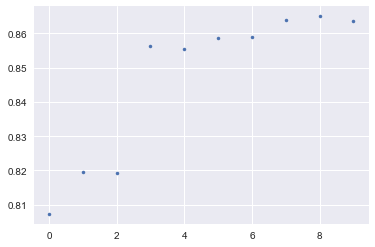

In [21]:
acc = []
for n in range(1, 11):
    cls = RandomForestClassifier(max_depth=n)
    cls.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, cls.predict(X_test)))
    
plt.plot(acc,'.')

In [22]:
cls = MLPClassifier(activation='logistic', alpha=.0000001)
cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.79433333333333334

In [23]:
cls = AdaBoostClassifier()
cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.85799999999999998

In [38]:
cls = GaussianNB()

cls.fit(X_train, y_train)
accuracy_score(y_test, cls.predict(X_test))

0.78500000000000003

In [35]:
cross_val_score(LogisticRegression(), data, target, cv=30)

array([ 0.78143713,  0.79341317,  0.79041916,  0.78742515,  0.80538922,
        0.79640719,  0.78143713,  0.7994012 ,  0.79041916,  0.79640719,
        0.78443114,  0.79341317,  0.78143713,  0.78678679,  0.78678679,
        0.78978979,  0.7957958 ,  0.79279279,  0.78078078,  0.78078078,
        0.8048048 ,  0.7957958 ,  0.77777778,  0.78678679,  0.78978979,
        0.7987988 ,  0.7957958 ,  0.77108434,  0.78313253,  0.79216867])

C:\Users\Achilles\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


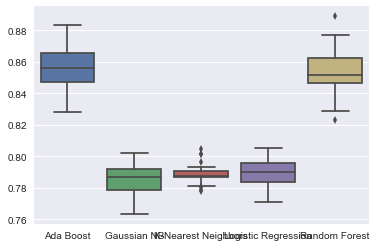

In [38]:
classifiers = [LogisticRegression(), AdaBoostClassifier(), GaussianNB(), RandomForestClassifier(max_depth=5), KNeighborsClassifier(10)]

names = ["Logistic Regression", "Ada Boost", "Gaussian NB", 'Random Forest', 'K-Nearest Neighbors']
scores = {}

for classifer, name in zip(classifiers, names):
    scores[name] = cross_val_score(classifer, data, target, cv=30)
    
sns.boxplot(pd.DataFrame(scores))